# Variable velocity walkers

This notebook illustrates a variable-velocity walker with a normally distributed velocity (the default setting) around $\mu = 5$ and $\sigma = 1$.

In [1]:
from math import floor
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML
from sadie.models.simple import SimpleModel
from sadie.agents.walkers import VariableVelocityWalker

In [2]:
m = SimpleModel(max_time=1000)
m.add_agent(VariableVelocityWalker(0, 0, loc = 5, scale = 2, reflect = True))
m.run()

In [3]:
df = m.to_df()

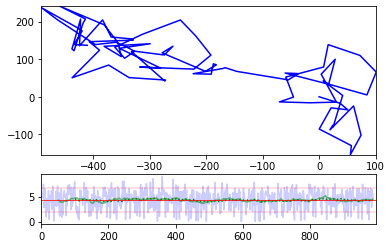

In [4]:
FRAMERATE: int = 10

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})
cam = Camera(fig)

for i in range(df.time.min(), df.time.max()):
    if i % FRAMERATE == 0:
        subdf = df[df.time < i]

        axs[0].plot(subdf.x, subdf.y, "b-")
        axs[0].set_ylim(df.y.min(), df.y.max())
        axs[0].set_xlim(df.x.min(), df.x.max())

        axs[1].plot(subdf.time, subdf.td.diff().rolling(window=2).mean(), "b-", alpha = 0.2)
        axs[1].plot(subdf.time, subdf.td.diff().rolling(window=floor(len(df) * 0.05)).mean(), "g-", alpha = 0.5)
        axs[1].plot(subdf.time, subdf.td.diff().rolling(window=floor(len(df) * 0.10)).mean(), "g:", alpha = 1.0)
        axs[1].axhline(subdf.td.diff().mean(), color = "red", lw = 0.75)
        axs[1].axhline(subdf.td.diff().mean() + subdf.td.diff().std(), color = "red", lw = 0.25)
        axs[1].axhline(subdf.td.diff().mean() - subdf.td.diff().std(), color = "red", lw = 0.25)
        axs[1].set_xlim(df.time.min(), df.time.max())

        cam.snap()

HTML(cam.animate().to_html5_video())